In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나이상 설정할 경우
from sklearn.model_selection import cross_validate

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수 - 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 평가함수 - 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류용
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀용
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 시간 측정을 위한모듈
import datetime
# 저장을 위한 모듈
import pickle

### 데이터를 불러온다.

In [3]:
df1 = pd.read_csv('data/boston.csv')
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.05023,35.0,6.06,0,0.4379,5.706,28.4,6.6407,1,304,16.9,394.02,12.43,17.1
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
333,0.05083,0.0,5.19,0,0.5150,6.316,38.1,6.4584,5,224,20.2,389.71,5.68,22.2
334,0.03738,0.0,5.19,0,0.5150,6.310,38.5,6.4584,5,224,20.2,389.40,6.75,20.7


In [4]:
# 데이터 프레임 정보 확인
# Dtype에서 Object(문자열)인 컬럼을 확인한다.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     336 non-null    float64
 1   ZN       336 non-null    float64
 2   INDUS    336 non-null    float64
 3   CHAS     336 non-null    int64  
 4   NOX      336 non-null    float64
 5   RM       336 non-null    float64
 6   AGE      336 non-null    float64
 7   DIS      336 non-null    float64
 8   RAD      336 non-null    int64  
 9   TAX      336 non-null    int64  
 10  PTRATIO  336 non-null    float64
 11  B        336 non-null    float64
 12  LSTAT    336 non-null    float64
 13  target   336 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 36.9 KB


In [5]:
# 결측치 확인
df1.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [6]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

display(X)
display(y)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.05023,35.0,6.06,0,0.4379,5.706,28.4,6.6407,1,304,16.9,394.02,12.43
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
333,0.05083,0.0,5.19,0,0.5150,6.316,38.1,6.4584,5,224,20.2,389.71,5.68
334,0.03738,0.0,5.19,0,0.5150,6.310,38.5,6.4584,5,224,20.2,389.40,6.75


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
331    17.1
332    19.4
333    22.2
334    20.7
335    21.1
Name: target, Length: 336, dtype: float64

In [7]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[-0.63326028,  0.12485095, -1.03628034, ..., -1.07088823,
         0.41031054, -0.92655695],
       [-0.60097475, -0.58885279, -0.25831126, ...,  0.06047401,
         0.41031054, -0.22972861],
       [-0.60100552, -0.58885279, -0.25831126, ...,  0.06047401,
         0.31149419, -1.08568842],
       ...,
       [-0.56479774, -0.58885279, -0.56557636, ...,  1.14658176,
         0.23574309, -0.80930218],
       [-0.5854857 , -0.58885279, -0.56557636, ...,  1.14658176,
         0.22821654, -0.63006989],
       [-0.58205565, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.41901131]])

In [8]:
# 학습용과 검증용으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)

### 기본모델 사용하기

In [9]:
# KFold 생성
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [21]:
# 사용할 모델들
model1 = KNeighborsRegressor()
model2 = LinearRegression()
model3 = Ridge(random_state=1)
model4 = Lasso(random_state=1)
model5 = ElasticNet(random_state=1)
model6 = SVR()
model7 = DecisionTreeRegressor(random_state=1)
model8 = RandomForestRegressor(random_state=1)
model9 = AdaBoostRegressor(random_state=1)
model10 = GradientBoostingRegressor(random_state=1)
model11 = LGBMRegressor(random_state=1)
model12 = XGBRegressor(random_state=1, silent=True, verbosity=0)
model_list1 =[
    ('m1', KNeighborsRegressor()),
    ('m2', LinearRegression()),
    ('m3', Ridge(random_state=1)),
    ('m4', Lasso(random_state=1)),
    ('m5', ElasticNet(random_state=1)),
    ('m6', SVR()),
    ('m7', DecisionTreeRegressor(random_state=1)),
    ('m8', RandomForestRegressor(random_state=1)),
    ('m9', AdaBoostRegressor(random_state=1)),
    ('m10', GradientBoostingRegressor(random_state=1)),
    ('m11', LGBMRegressor(random_state=1)),
    ('m12', XGBRegressor(random_state=1, silent=True, verbosity=0))
]
model13 = VotingRegressor(estimators=model_list1)

In [22]:
# 성능 값을 담을 리스트
score_list = []
# 학습 모델의 이름을 담을 리스트
model_name_list = []
# 최적으로 튜닝된 학습 모델을 담을 리스트
best_model_list = []

In [23]:
# 교차 검증을 수행할 학습 모델 리스트
check_list = [
    model1, model2, model3, model4, model5, model6, model7,
    model8, model9, model10, model11, model12, model13
]
# 모델의 이름
check_name_list = [
    'KNN (Basic)', 'LinearRegression (Basic)', 'Ridge (Basic)',
    'Lasso (Basic)', 'ElasticNet (Basic)', 'SVR (Basic)',
    'DecisionTree (Basic)', 'RandomForest (Basic)', 'AdaBoost (Basic)',
    'GradientBoost (Basic)', 'LGBM (Basic)', 'XGBoost (Basic)',
    'Voting (Basic)'
]

In [24]:
# 교차 검증
for idx, ml in enumerate(check_list) :
    score = cross_val_score(ml, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)
    
    # 현재 알고리즘의 이름과 평가 점수의 평균을 출력한다.
    print(f'{check_name_list[idx]} : {score.mean()}')
    
    # 현재 알고리즘의 이름과 평가 점수의 평균을 리스트에 담는다.
    score_list.append(score.mean())
    model_name_list.append(check_name_list[idx])
    best_model_list.append(ml)
    

KNN (Basic) : -19.358368115942024
LinearRegression (Basic) : -11.029601395191566
Ridge (Basic) : -10.998428178103214
Lasso (Basic) : -14.250213147569323
ElasticNet (Basic) : -17.88749354769271
SVR (Basic) : -32.177265674961845
DecisionTree (Basic) : -16.868909420289853
RandomForest (Basic) : -8.511162467572468
AdaBoost (Basic) : -9.8378750283109
GradientBoost (Basic) : -7.750216525423054
LGBM (Basic) : -8.250803907395914
XGBoost (Basic) : -9.627570145008594
Voting (Basic) : -8.775059625561585


### 하이퍼 파라미터 튜닝

In [26]:
# 튜닝하기 위해 사용할 파라미터 후보 값
parameter_list = [
    # KNN
    {
        # 확인할 주변 이웃의 개수
        'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # LinearRegression
    # LinearRegression은 튜닝할 하이퍼 파라미터가 없다.
    # Ridge
    {
        # 규제의 강도
        'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
    },
    # Lasso
    {
        # 규제의 강도
        'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
    },
    # ElElasticNet
    {
        # 규제의 강도
        'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
    },
    # SVR (규제의 종류를 l2만 사용한다.)
    {
        # 규제의 강도
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # DecisionTree
    {
        # 생성될 최대 질문 깊이. None은 무한대
        'max_depth' :[None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # RandomForest
    {
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # AdaBoost
    {
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # GradientBoost
    {
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # LGBM
    {
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # XGBoost
    {
        # 내부에서 사용할 알고리즘 종류(gbtree : 결정트리, gblinear : 선형모델)
        'booster' : ['gbtree', 'gblinear'],
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
]

In [27]:
# 사용할 모델들
model1 = KNeighborsRegressor()
model3 = Ridge(random_state=1)
model4 = Lasso(random_state=1)
model5 = ElasticNet(random_state=1)
model6 = SVR()
model7 = DecisionTreeRegressor(random_state=1)
model8 = RandomForestRegressor(random_state=1)
model9 = AdaBoostRegressor(random_state=1)
model10 = GradientBoostingRegressor(random_state=1)
model11 = LGBMRegressor(random_state=1)
model12 = XGBRegressor(random_state=1, silent=True, verbosity=0)

In [28]:
# 교차 검증을 수행할 학습 모델 리스트
check_list = [
    model1, model3, model4, model5, model6, model7,
    model8, model9, model10, model11, model12
]
# 모델의 이름
check_name_list = [
    'KNN (Tuning)', 'Ridge (Tuning)',
    'Lasso (Tuning)', 'ElasticNet (Tuning)', 'SVR (Tuning)',
    'DecisionTree (Tuning)', 'RandomForest (Tuning)', 'AdaBoost (Tuning)',
    'GradientBoost (Tuning)', 'LGBM (Tuning)', 'XGBoost (Tuning)',
]

In [29]:
# 하이퍼 파라미터 튜닝
for idx, ml in enumerate(check_list) :
    grid1 = GridSearchCV(ml, param_grid=parameter_list[idx], scoring='neg_mean_squared_error', cv=kfold)
    grid1.fit(X_train, y_train)
    
    # 현재 알고리즘의 이름과 평가 점수의 평균을 리스트에 담는다.
    score_list.append(grid1.best_score_)
    model_name_list.append(check_name_list[idx])
    best_model_list.append(grid1.best_estimator_)
    
    print(f'{check_name_list[idx]} : {grid1.best_score_}')
    print(grid1.best_params_)

KNN (Tuning) : -16.21874033816425
{'n_neighbors': 3}
Ridge (Tuning) : -10.95506708573998
{'alpha': 10}
Lasso (Tuning) : -11.015764351485732
{'alpha': 0.01}
ElasticNet (Tuning) : -10.99086973987509
{'alpha': 0.01}
SVR (Tuning) : -9.467892313177085
{'C': 100}
DecisionTree (Tuning) : -12.79844370145784
{'max_depth': 4}
RandomForest (Tuning) : -8.336213512962958
{'n_estimators': 300}
AdaBoost (Tuning) : -9.8378750283109
{'learning_rate': 1, 'n_estimators': 50}
GradientBoost (Tuning) : -7.437481704401469
{'learning_rate': 0.1, 'n_estimators': 300}
LGBM (Tuning) : -8.250803907395914
{'learning_rate': 0.1, 'n_estimators': 100}
XGBoost (Tuning) : -8.949708989333171
{'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 250}


In [33]:
model_list1 =[
    ('m1', best_model_list[13]),
    ('m2', best_model_list[14]),
    ('m3', best_model_list[15]),
    ('m4', best_model_list[16]),
    ('m5', best_model_list[17]),
    ('m6', best_model_list[18]),
    ('m7', best_model_list[19]),
    ('m8', best_model_list[20]),
    ('m9', best_model_list[21]),
    ('m10', best_model_list[22]),
    ('m11', best_model_list[23]),
]
model13 = VotingRegressor(estimators=model_list1)

In [34]:
# 튜닝된 모델로 구성된 보팅 모델들을 교차 검증한다.
score1 = cross_val_score(model13, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)

score_list.append(score1.mean())

model_name_list.append('Voting (Tuning)')

best_model_list.append(model13)

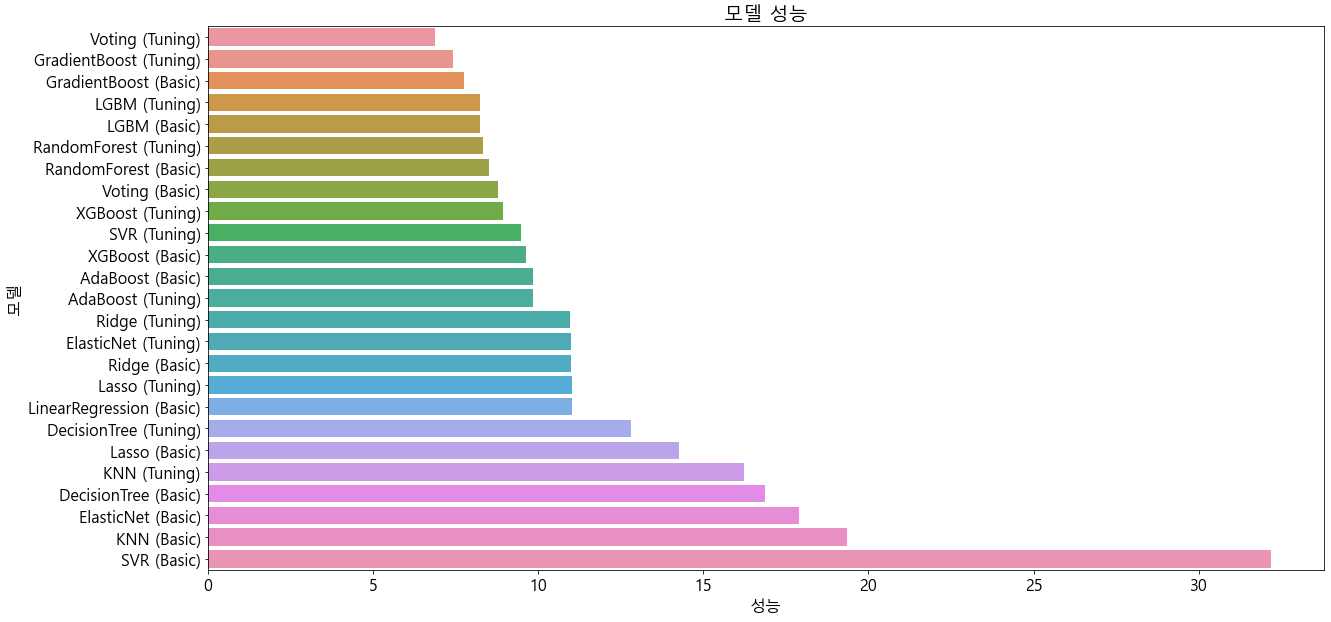

In [36]:
# 결과를 시각화한다.
d1 = {
    'model_name' : model_name_list,
    'score' : score_list
}

result_df = pd.DataFrame(d1)
result_df['score'] = abs(result_df['score'])
result_df.sort_values(by='score', inplace=True)

sns.barplot(data=result_df, x='score', y='model_name')
plt.title('모델 성능')
plt.xlabel('성능')
plt.ylabel('모델')
plt.show()

In [37]:
# 각 모델로 부터 검증 데이터에 대한 평가를 실시한다.
# 전체 모델을 X_train으로 학습을 진행한다.
for ml in best_model_list :
    ml.fit(X_train, y_train)

In [38]:
# 검증 데이터를 통해 예측 결과를 가져온다.
predict_list = []

for ml in best_model_list :
    pred = ml.predict(X_test)
    predict_list.append(pred)

In [40]:
# r2를 측정해본다.
accuray_list = []

for pred in predict_list :
    r1 = r2_score(pred, y_test)
    accuray_list.append(r1)

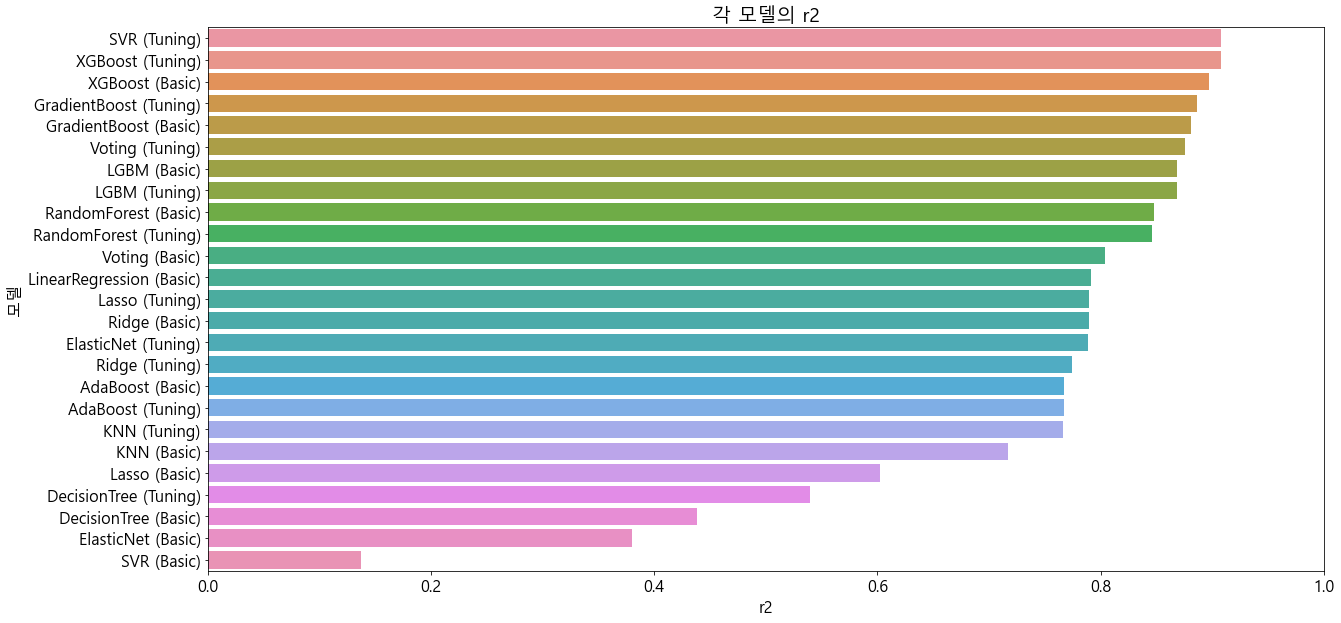

In [41]:
# 정확도를 시각화한다.
d100 = {
    'model_name' : model_name_list,
    'r2' : accuray_list
}

df100 = pd.DataFrame(d100)
df100.sort_values(by='r2', ascending=False, inplace=True)

sns.barplot(data=df100, x='r2', y='model_name')
plt.title('각 모델의 r2')
plt.xlabel('r2')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

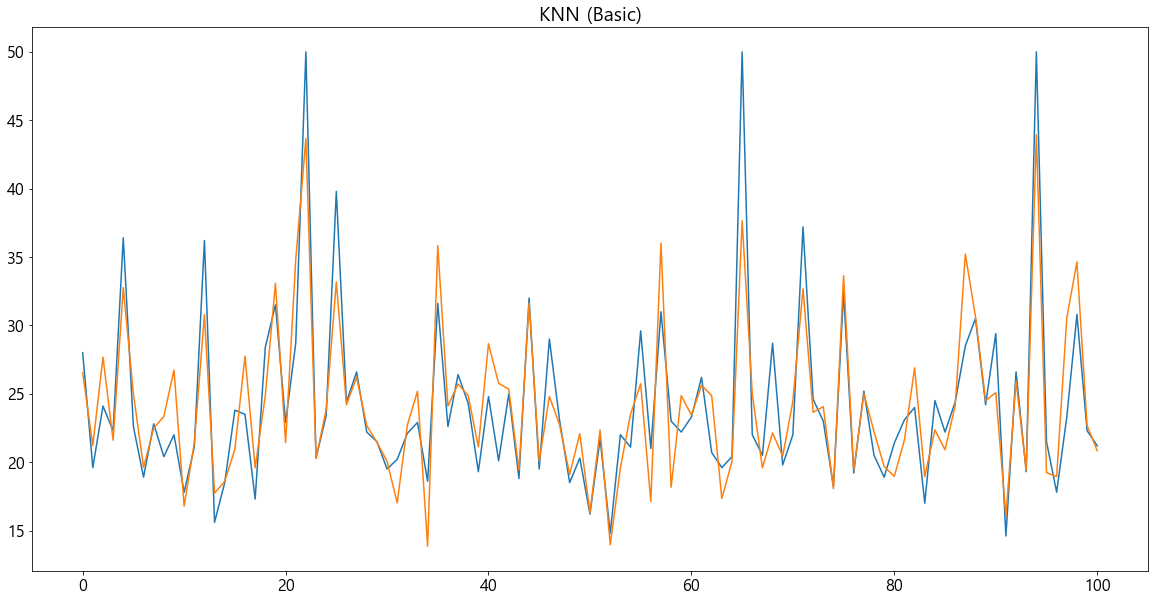

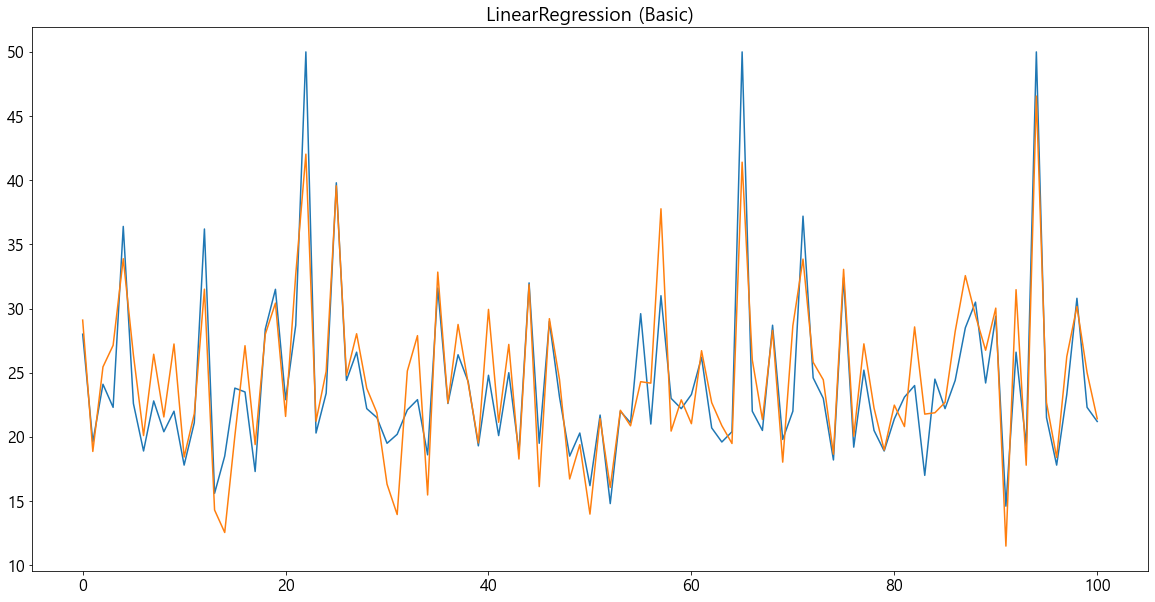

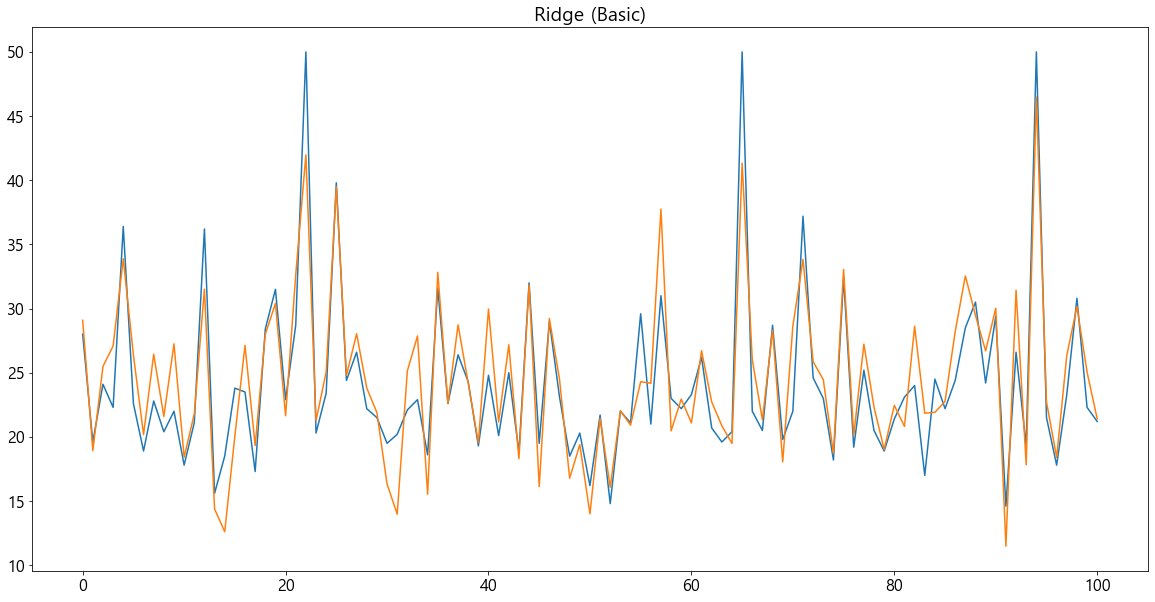

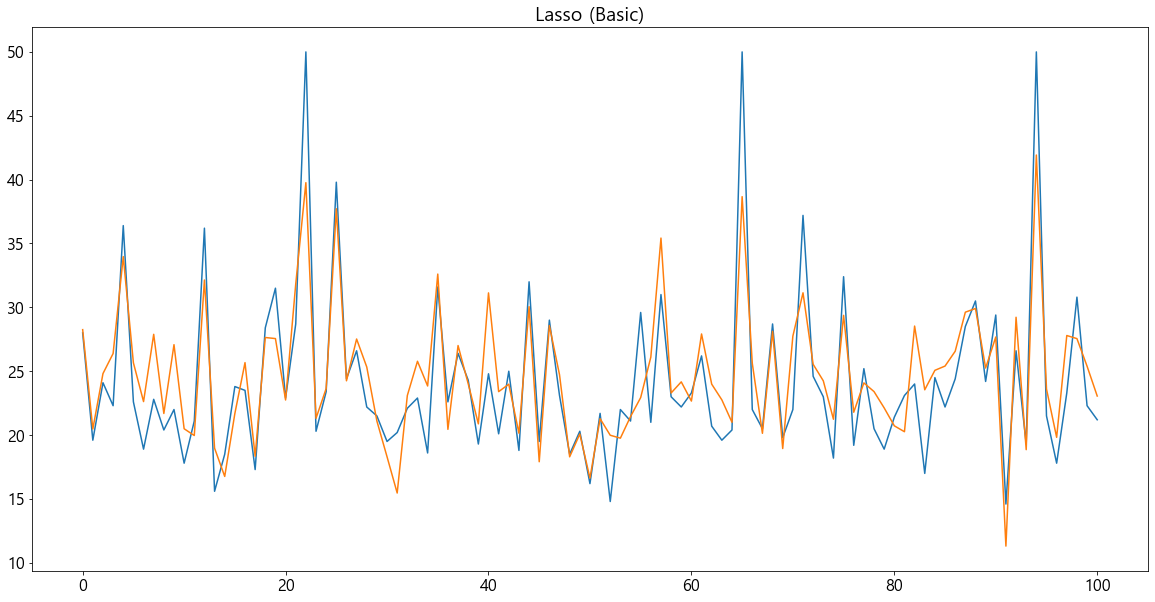

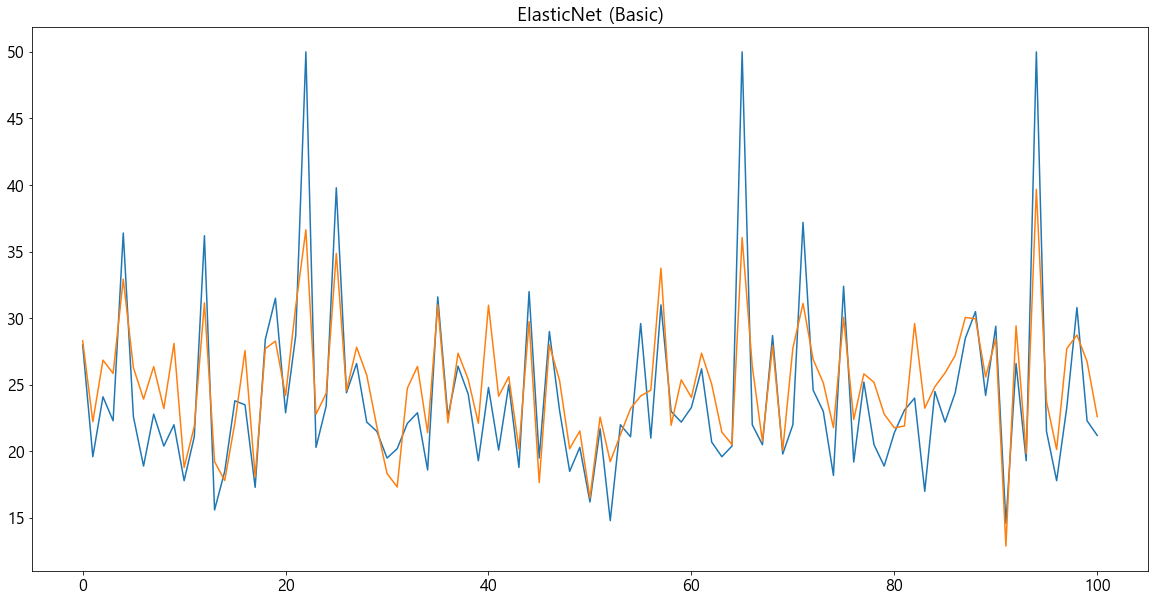

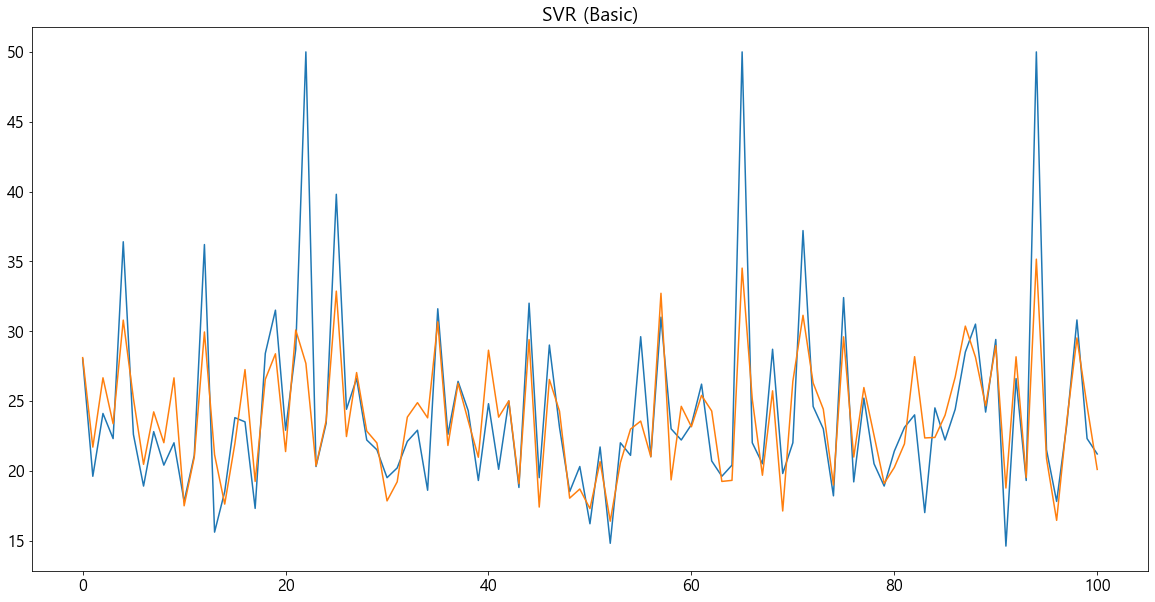

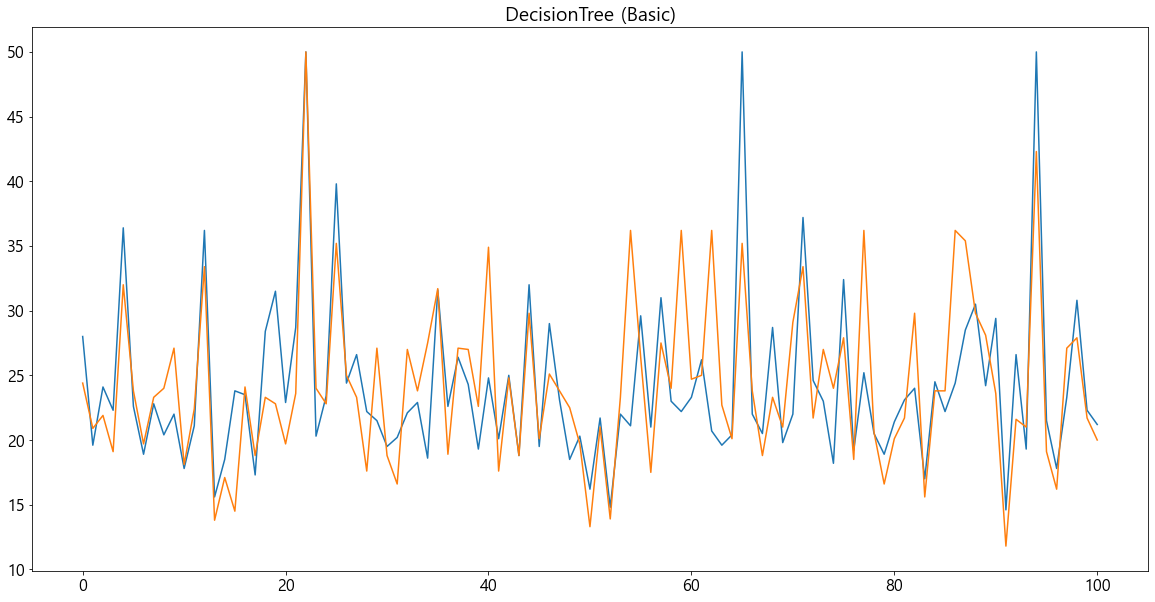

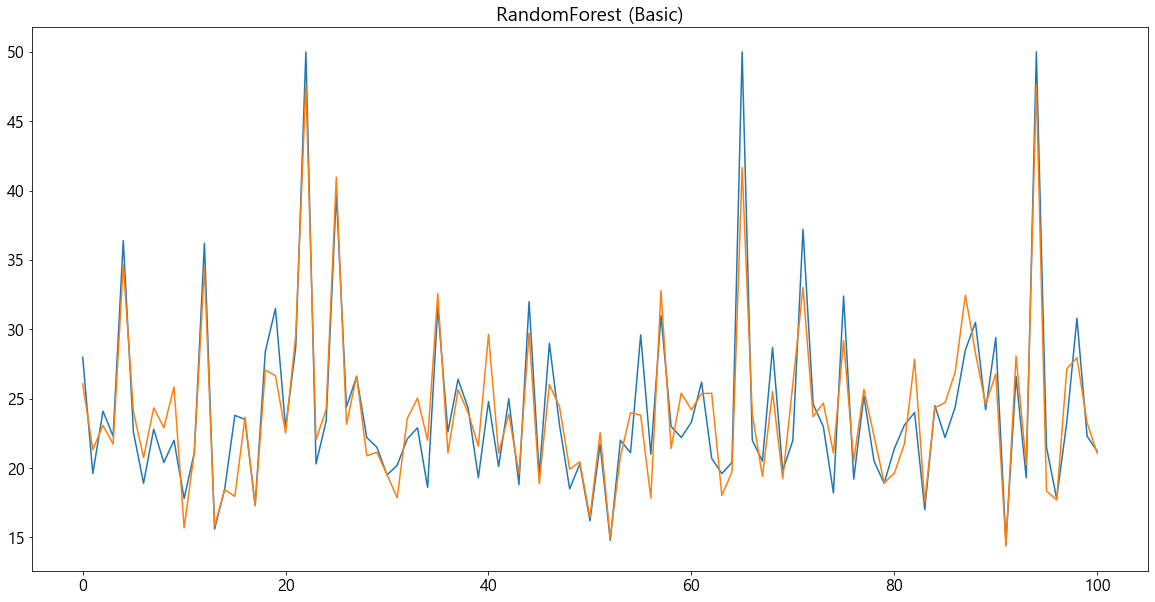

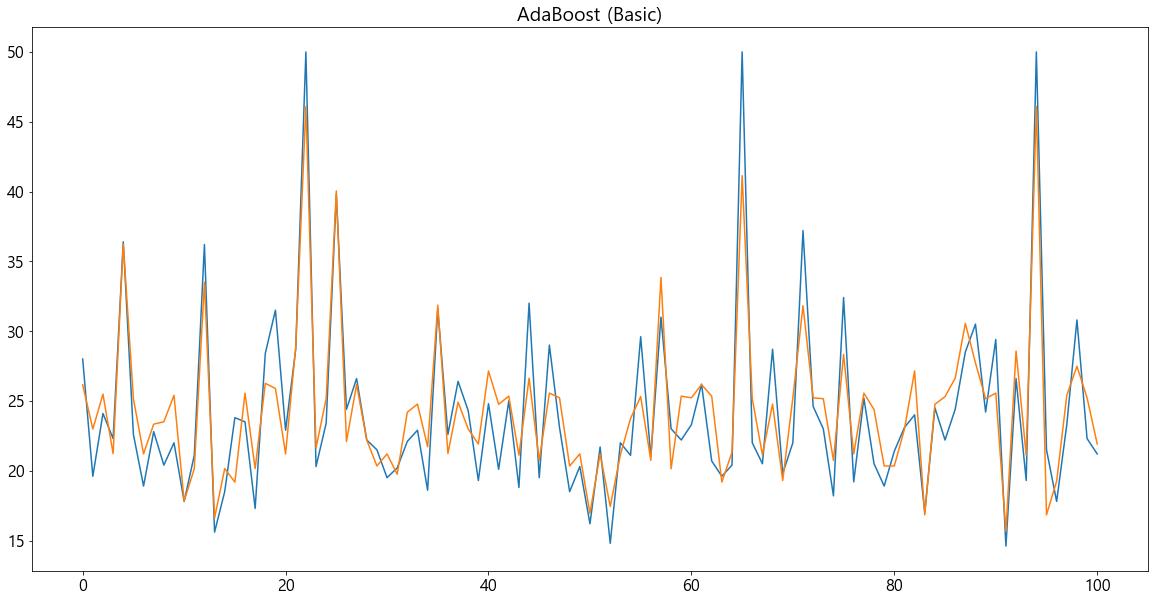

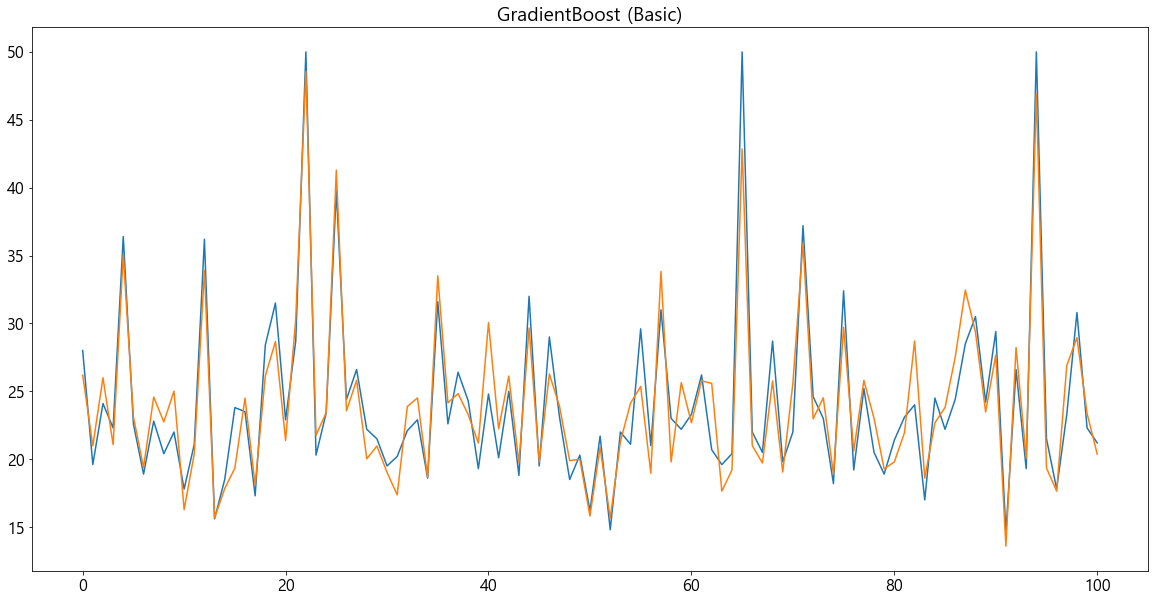

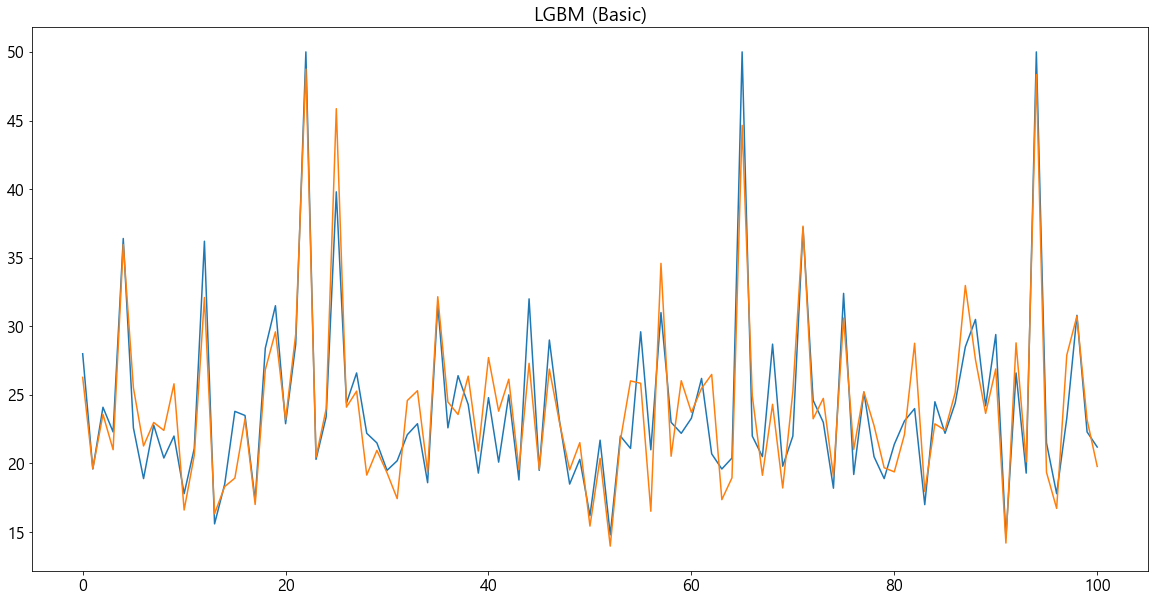

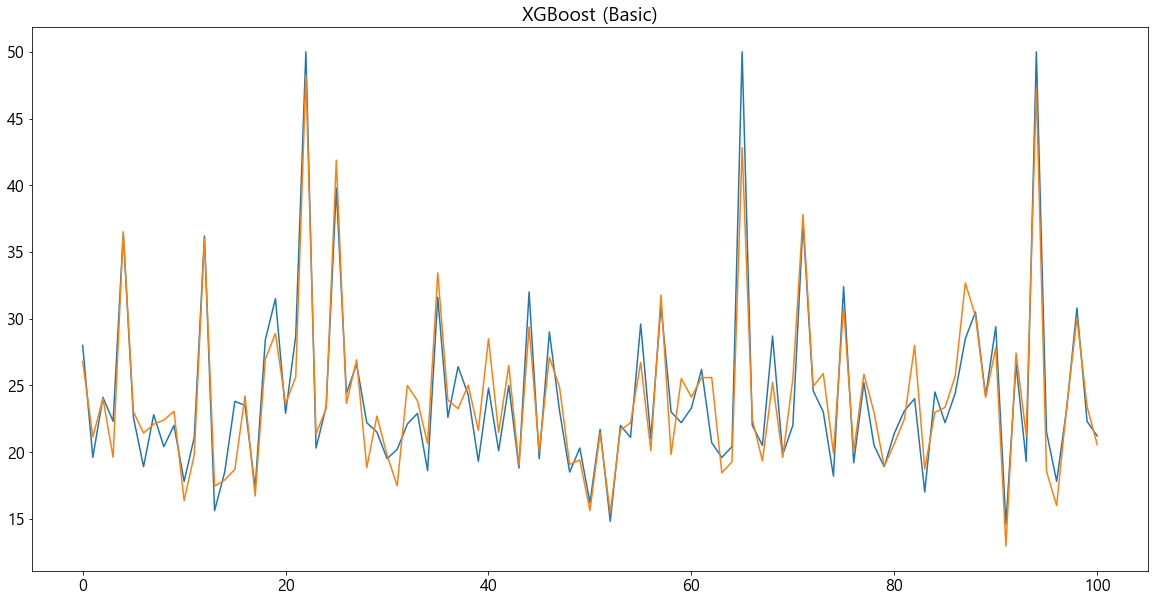

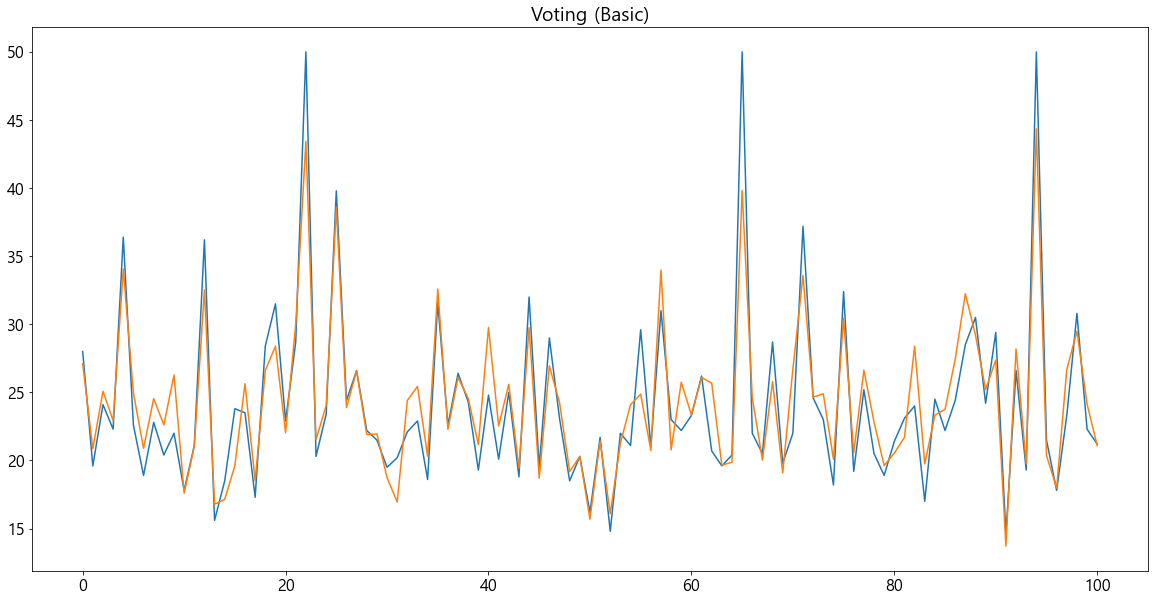

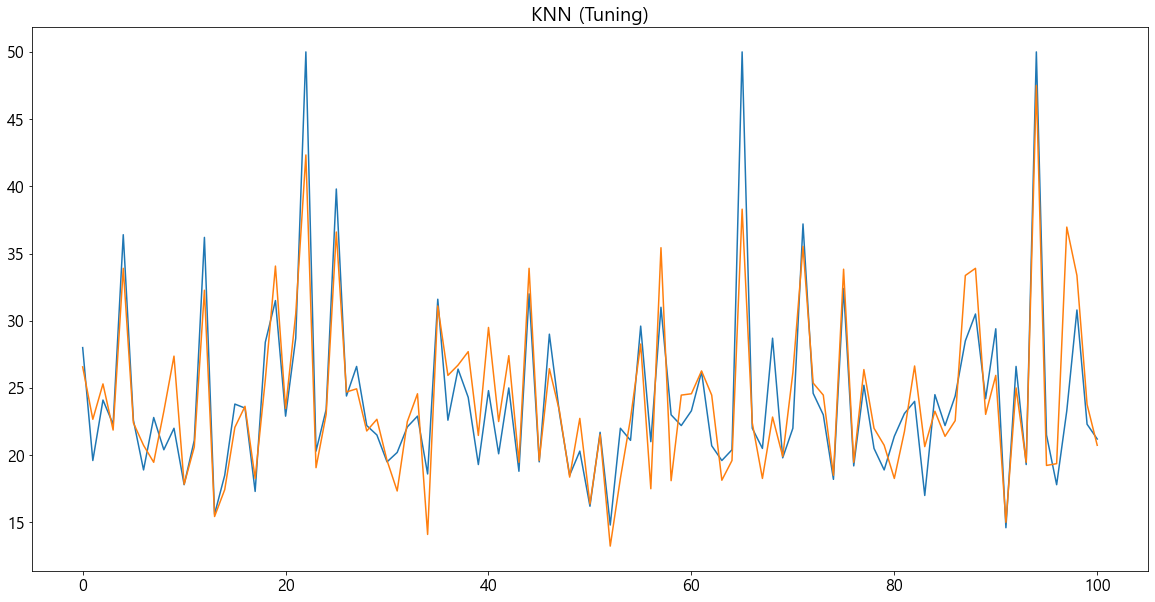

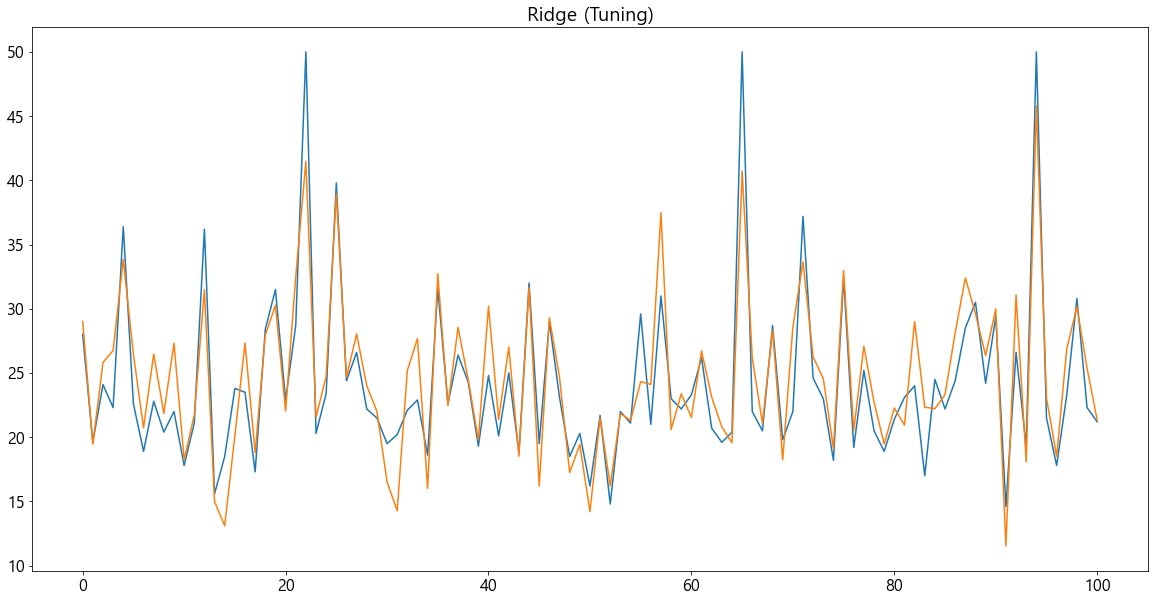

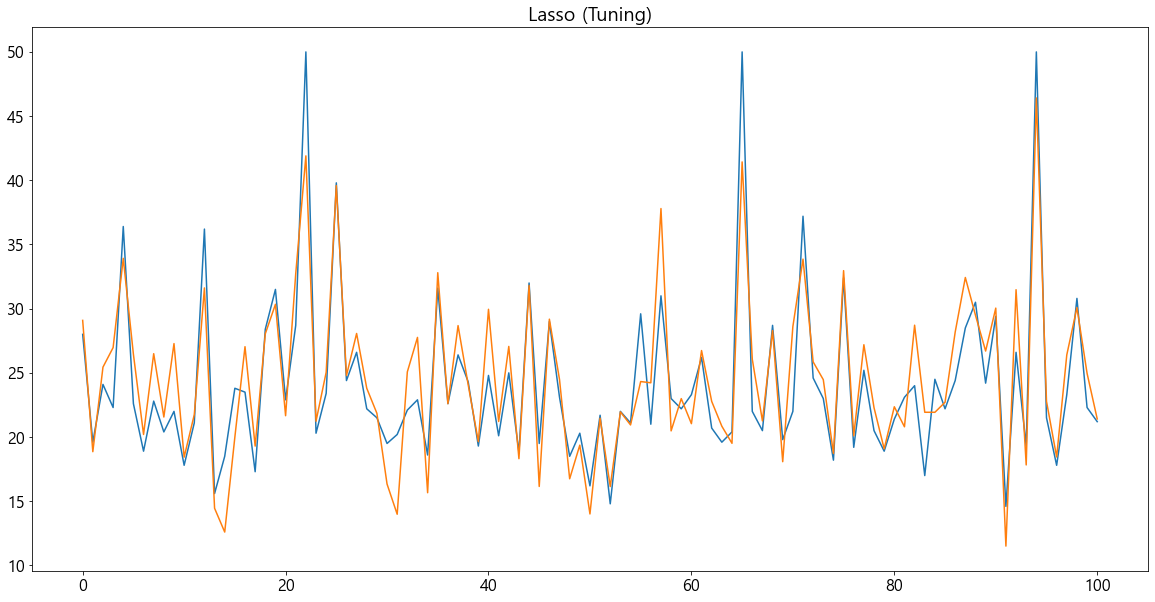

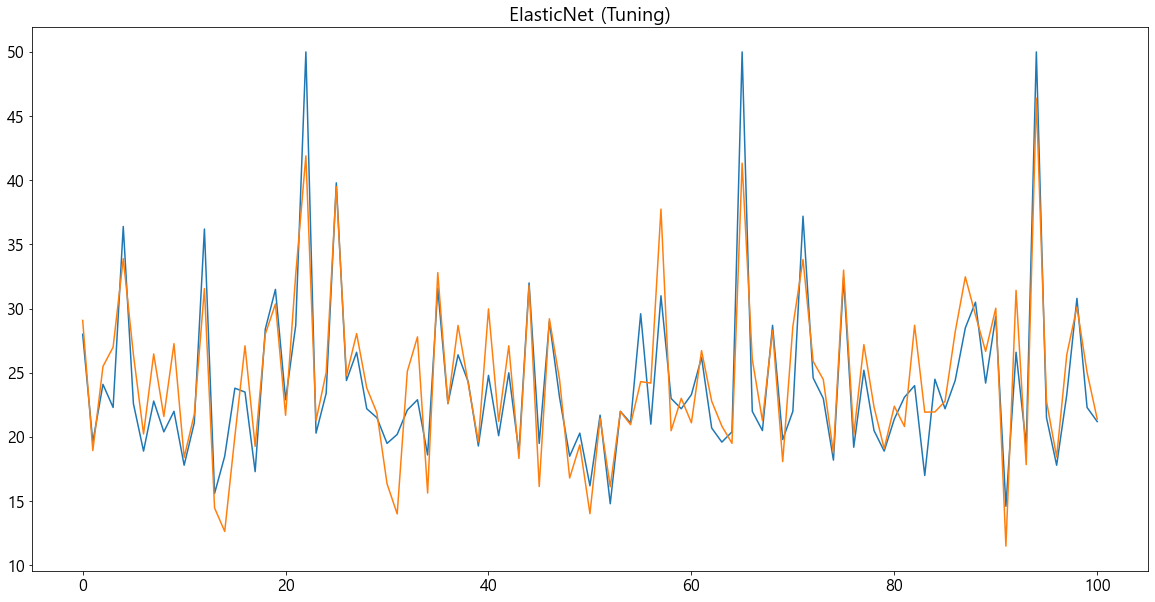

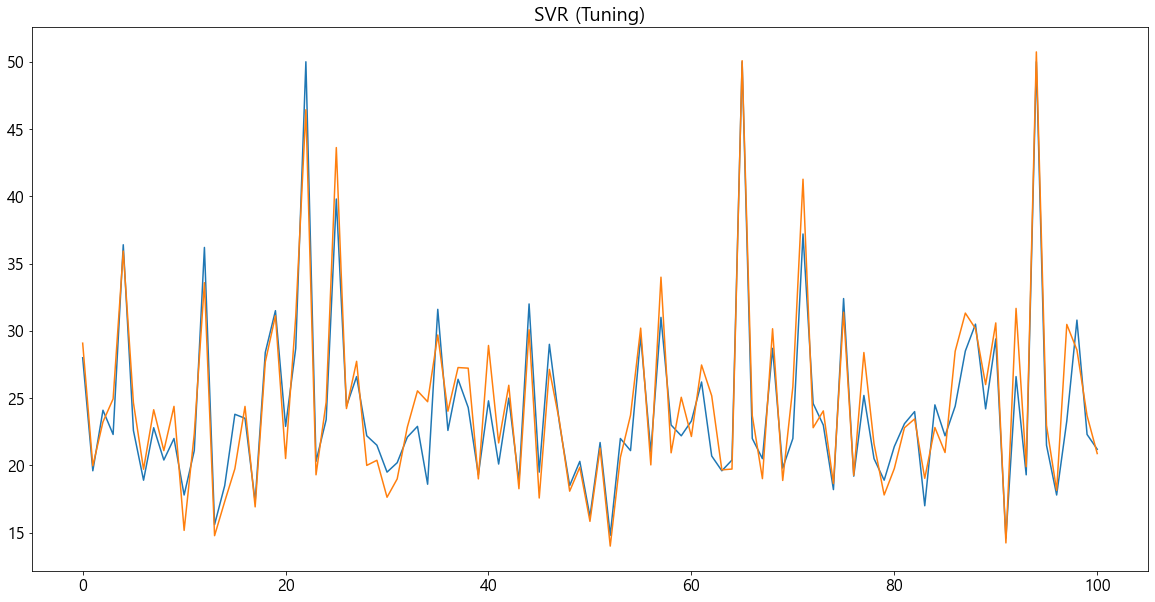

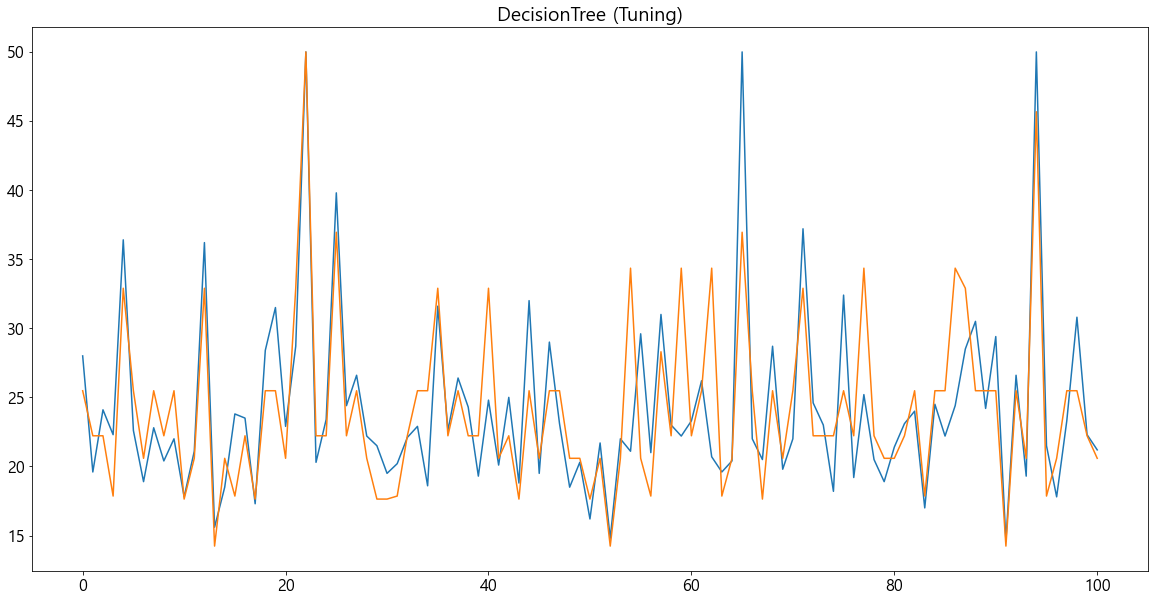

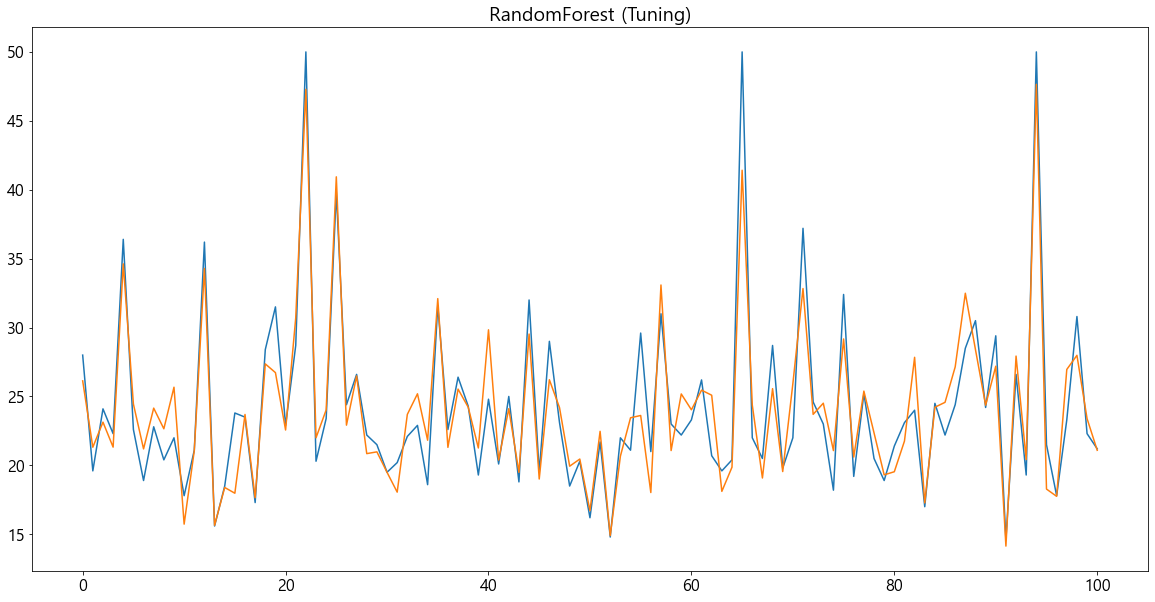

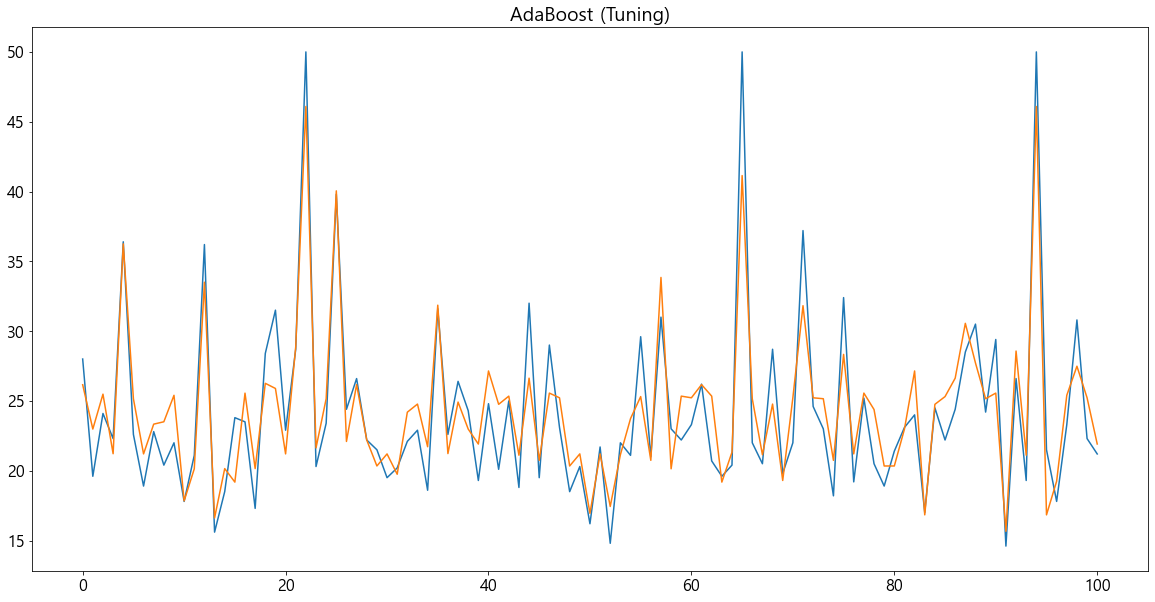

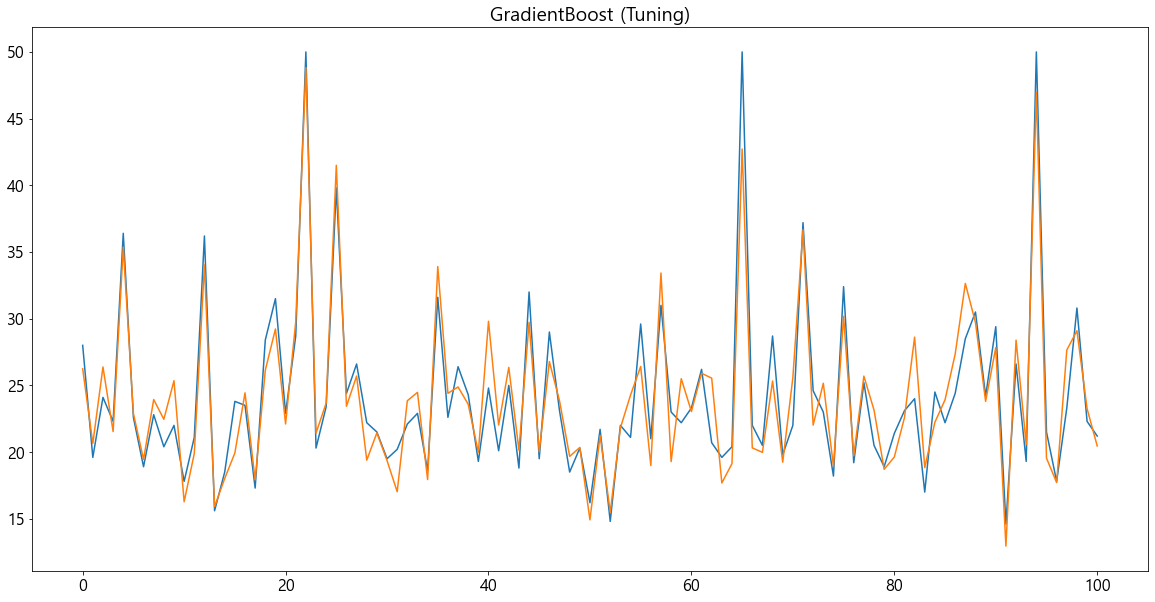

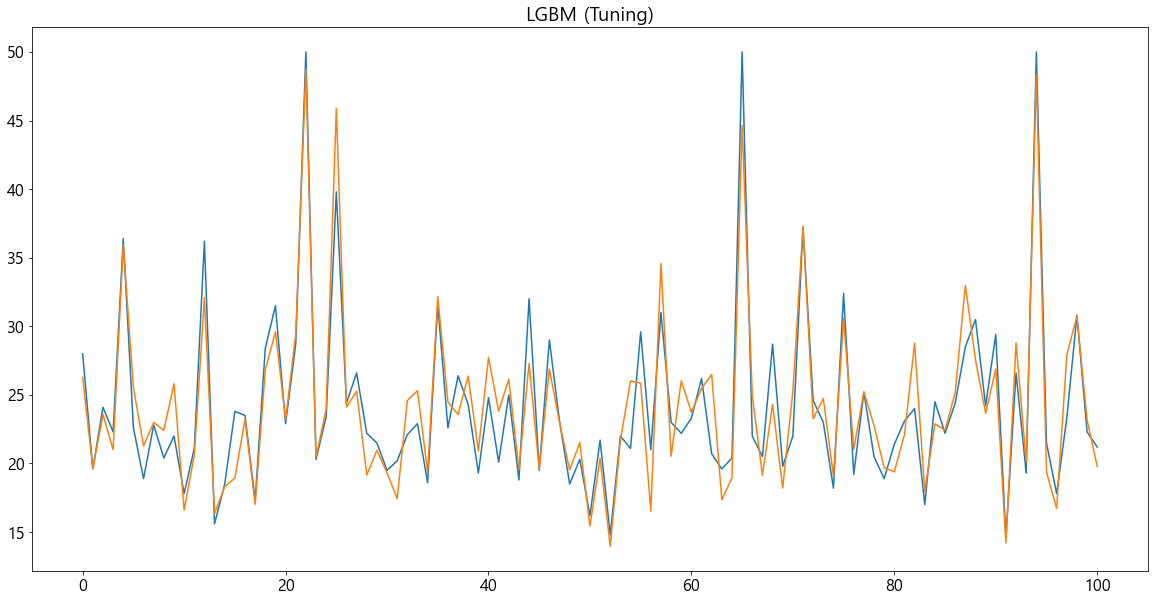

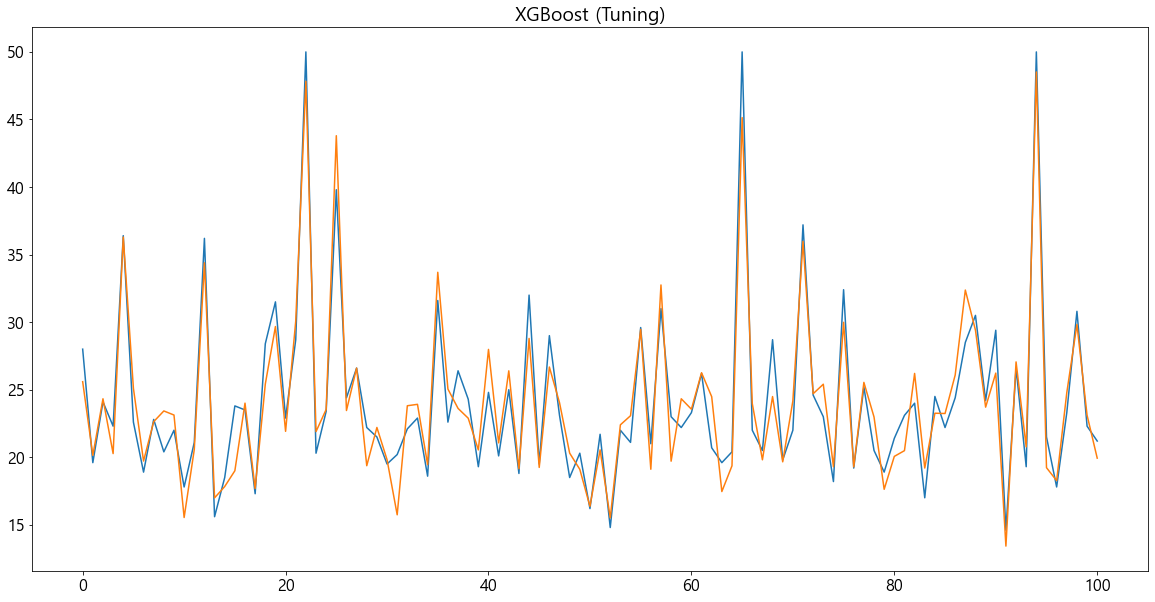

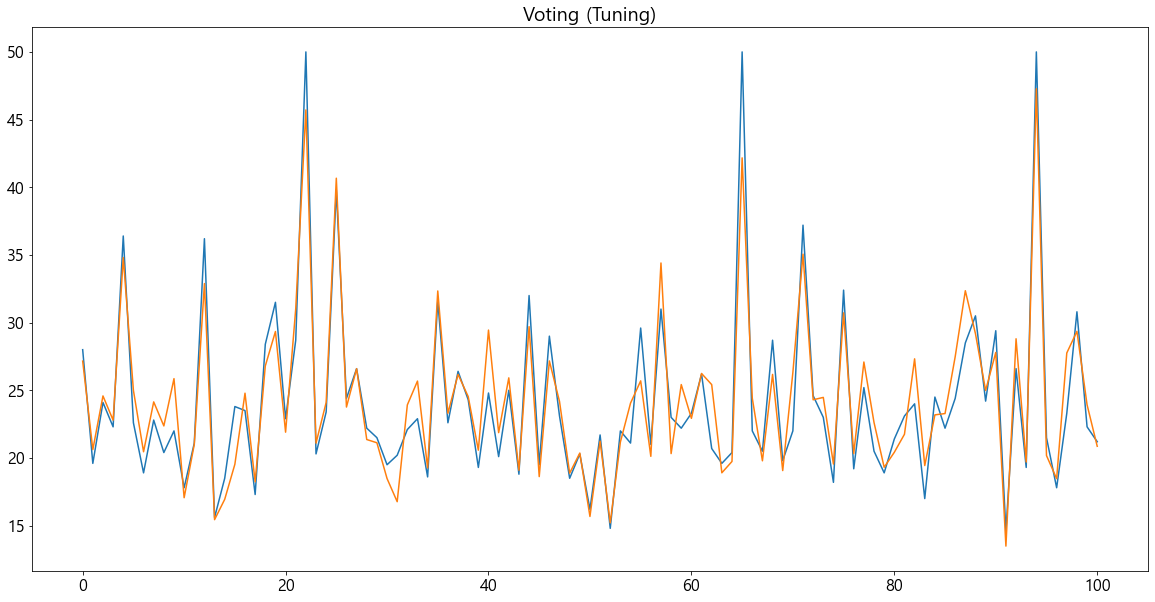

In [46]:
# 진짜 결과와 예측 결과의 패턴을 비교한다.
for idx, pred in enumerate(predict_list):
    plt.plot(y_test.values, label='원본')
    plt.plot(pred, label='예측')
    plt.title(model_name_list[idx])
    plt.show()

- 회귀는 분류처럼 단계로 선정하지 않고 종합적으로 봐야 한다.
- mse, r2, 비교 그래프 모두 종합적으로 보고 판단해야 한다.

In [48]:
best_model_list

[KNeighborsRegressor(),
 LinearRegression(),
 Ridge(random_state=1),
 Lasso(random_state=1),
 ElasticNet(random_state=1),
 SVR(),
 DecisionTreeRegressor(random_state=1),
 RandomForestRegressor(random_state=1),
 AdaBoostRegressor(random_state=1),
 GradientBoostingRegressor(random_state=1),
 LGBMRegressor(random_state=1),
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
            

In [49]:
best_model = best_model_list[17]
best_model

SVR(C=100)

In [50]:
# 선정된 모델에 전체 데이터를 학습한다.
best_model.fit(X, y)

SVR(C=100)

In [52]:
# 모델 저장
with open('./02_Model.dat', 'wb') as fp :
    pickle.dump(best_model, fp)
    pickle.dump(scaler1, fp)

### 예측

In [54]:
# 복원한다.
with open('./02_Model.dat','rb') as fp :
    model100 = pickle.load(fp)
    scaler100 = pickle.load(fp)
    
print(model100)
print(scaler100)

SVR(C=100)
StandardScaler()


In [56]:
# 예측할 데이터를 불러온다.
df2 = pd.read_csv('./data/boston_new.csv')
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03427,0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80
1,0.03041,0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56
2,0.03306,0,5.19,0,0.515,6.059,37.3,4.8122,5,224,20.2,396.14,8.51
3,0.05497,0,5.19,0,0.515,5.985,45.4,4.8122,5,224,20.2,396.90,9.74
4,0.06151,0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
166,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
167,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
168,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [57]:
# 표준화
X2 = scaler100.transform(df2)
X2

array([[-0.59026931, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.11917412],
       [-0.59620652, -0.58885279, -0.56557636, ...,  1.14658176,
         0.35956701,  0.00813106],
       [-0.59213046, -0.58885279, -0.56557636, ...,  1.14658176,
         0.39185835, -0.3352579 ],
       ...,
       [-0.54952402, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.81600245],
       [-0.47441672, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.3265473 , -0.67529673],
       [-0.57005817, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.4407872 ]])

In [58]:
# 예측한다.
pred = model100.predict(X2)
pred

array([20.51501073, 19.97609198, 22.07743581, 21.57850312, 20.63577072,
       33.09434575, 19.41991211, 27.24836563, 33.45943581, 20.67432748,
       18.61799618, 25.91578457, 28.15750737, 29.28080029, 26.30081614,
       28.60607442, 26.49084744, 32.05948208, 25.50885044, 26.41668337,
       25.76754983, 25.76756237, 25.76754901, 25.7675969 , 25.76757751,
       25.76761111, 25.76762899, 25.76754399, 25.76761443, 25.7675572 ,
       25.76760232, 25.76754974, 25.76757203, 25.76755395, 25.76755086,
       25.76754984, 25.7675498 , 25.76754974, 25.76754974, 25.76754974,
       25.76754974, 25.7675498 , 25.76754974, 25.76754974, 25.76754974,
       25.76754974, 25.76755005, 25.76755148, 25.76754974, 25.76754974,
       25.76754974, 25.76754974, 25.76754974, 25.76755108, 25.76755316,
       25.76755948, 25.76754974, 25.76755023, 25.76754974, 25.76755019,
       25.76755585, 25.76755188, 25.76754974, 25.7675498 , 25.76754974,
       25.76754974, 25.76754985, 25.76754974, 25.76754974, 25.76

In [60]:
# 저장한다.
df2['target'] = pred
df2.to_csv('./data/boston_result.csv')